In [18]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('processed_cancer_care_data.csv')

print(df.head())

print('features:', df.columns)

  cancer_site  year         sex       age         scenario  total_costs  \
0    AllSites  2010  Both sexes  All ages        base_case     124565.6   
1    AllSites  2010  Both sexes  All ages  trend_incidence     122420.8   
2    AllSites  2010  Both sexes  All ages   trend_survival     125397.7   
3    AllSites  2010  Both sexes  All ages       trend_both     123236.3   
4     Bladder  2010  Both sexes  All ages        base_case       3980.7   

   initial_cost  continuing_cost  last_year_cost  is_trend_incidence  \
0       40463.5          46642.8         37459.2               False   
1       38552.7          46671.9         37196.3                True   
2       40463.5          47136.3         37797.9               False   
3       38552.7          47155.7         37527.8                True   
4         978.7           1895.8          1106.3               False   

   is_trend_survival  continuing_to_initial_ratio  last_year_to_initial_ratio  \
0              False               

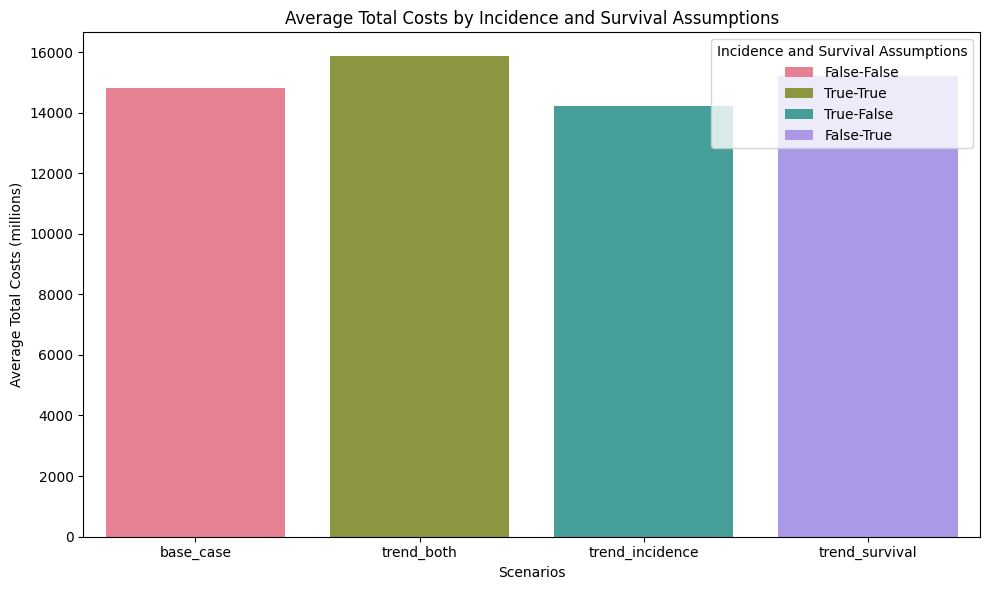

In [19]:
df['Incidence and Survival Assumptions'] = df['is_trend_incidence'].astype(str) + "-" + df['is_trend_survival'].astype(str)

# Grouped data by 'scenario' and mean 'total_costs'
grouped_data = df.groupby(['scenario', 'Incidence and Survival Assumptions'])['total_costs'].mean().reset_index()

# Unique combinations for color mapping
unique = grouped_data['Incidence and Survival Assumptions'].unique()
palette = sns.color_palette("husl", len(unique))
color_map = dict(zip(unique, palette))

plt.figure(figsize=(10, 6))

sns.barplot(
    data=grouped_data,
    x='scenario',
    y='total_costs',
    hue='Incidence and Survival Assumptions',
    palette=color_map
)

plt.xlabel("Scenarios")
plt.ylabel("Average Total Costs (millions)")
plt.title("Average Total Costs by Incidence and Survival Assumptions")
plt.tight_layout()

plt.show()

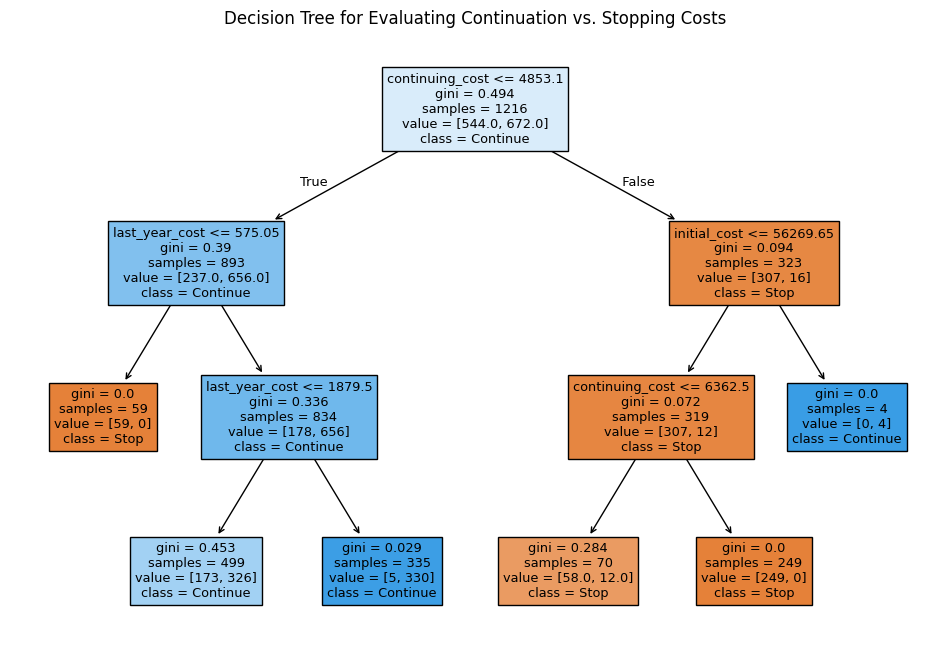

In [20]:
X = df[['initial_cost', 'continuing_cost', 'last_year_cost']]
y = (df['continuing_cost'] < df['last_year_cost']).astype(int)

# Initialize and fit the decision tree
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, class_names=['Stop', 'Continue'], filled=True)
plt.title('Decision Tree for Evaluating Continuation vs. Stopping Costs')
plt.show()

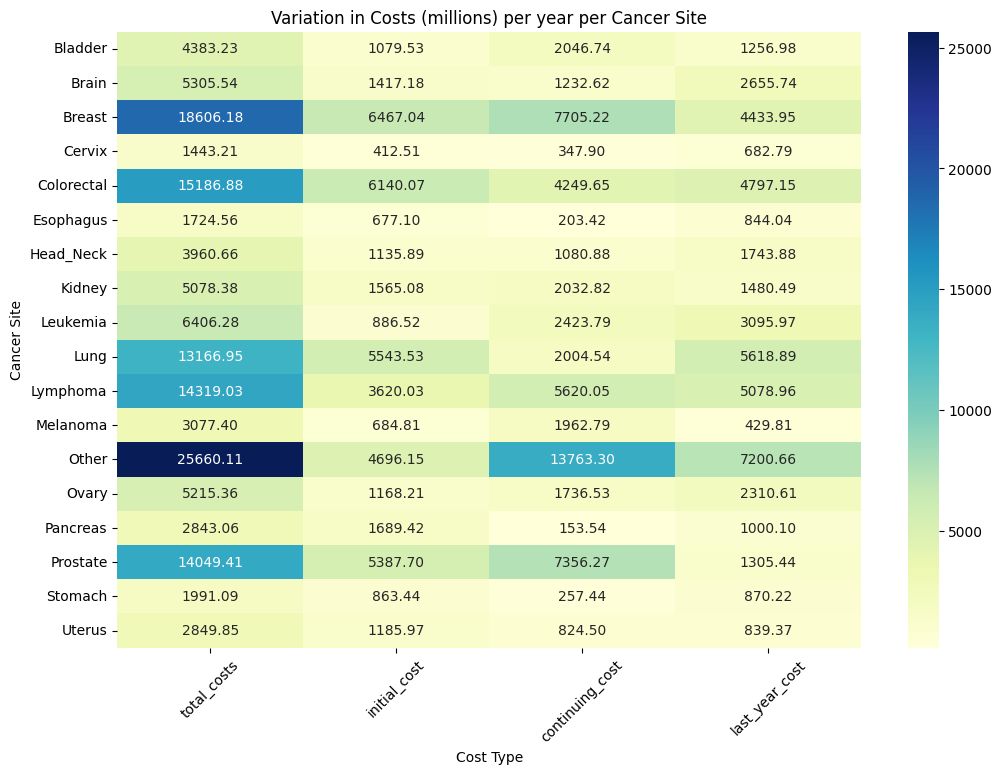

In [21]:
filtered_df = df[df['cancer_site'] != 'AllSites']

# Group data by 'cancer_site' and calculate mean costs
heatmap_data = filtered_df.groupby('cancer_site')[['total_costs', 'initial_cost', 'continuing_cost', 'last_year_cost']].mean()

# Reset and set index for heatmap
heatmap_data.reset_index(inplace=True)
heatmap_data.set_index('cancer_site', inplace=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title('Variation in Costs (millions) per year per Cancer Site')
plt.xlabel('Cost Type')
plt.xticks(rotation=45)
plt.ylabel('Cancer Site')
plt.show()